# Part C. Self-Taught Learning
## Question 3 [Self Taught Neural Network Learning]
**STEP 1:** Load Task2C_labeled.csv, Task2C_unlabeled.csv and Task2C_test.csv data sets and required libraries (e.g., H2O)

In [1]:
#libraries
library(reshape2)
library(ggplot2)
library(corrplot)

corrplot 0.84 loaded


In [2]:
options(warn=-1)
library(h2o)
h2o.init()
# #If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, startH2O = FALSE)

labeled.frame <- h2o.importFile(path = 'Task2C_labeled.csv',sep=',')  # use absolute address or relative to the start location of the H2O instance!
unlabeled.frame <- h2o.importFile(path = 'Task2C_unlabeled.csv',sep=',')
test.frame <- h2o.importFile(path = 'Task2C_test.csv',sep=',')

labeled.frame[,1] <- as.factor(labeled.frame$label)
unlabeled.frame[,1] <- NA
train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
test.frame[,1] <- as.factor(test.frame$label)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /var/folders/mx/bg2cggnd6n3flllvhhd1blr00000gn/T//RtmpAumXCp/fileb9d6675e593/h2o_parulgandass_started_from_r.out
    /var/folders/mx/bg2cggnd6n3flllvhhd1blr00000gn/T//RtmpAumXCp/fileb9d46334a72/h2o_parulgandass_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 443 milliseconds 
    H2O cluster timezone:       Australia/Melbourne 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.0.1 
    H2O cluster version age:    2 months and 8 days  
    H2O cluster name:           H2O_started_from_R_parulgandass_yeh411 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.78 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection p

## Autoencoder
**STEP 2:** Train an autoencoder with only one hidden layer and change the number of its neurons to: 20, 40, 60, 80, ..., 400 (i.e. from 20 to 400 with a step size of 20) and  
**STEP 3:** record the reconstruction error (the average of Euclidian distances between the input and output of the autoencoder).

In [14]:
options(warn=-1)
K <- seq(20, 400, 20) # number of neurons: 20, 40, 60, 80, ..., 400 
error <- data.frame('Neurons'=K)     # dataframe to record reconstruction error
flag = 1 #counter 
AE = c() # vectore to store models

#for every different number of neurons in hidden layer
for (k in K){
    
    #train model on labeled and unlabeled data
    AE.model <- h2o.deeplearning(    
        x = 2:785, # select all pixels
        training_frame = train.frame, #  labeled and unlabeled frame    
        hidden = c(k), # number of units
        epochs = 50, # maximum number of epoches  
        activation = 'Tanh', # activation function 
        autoencoder = TRUE  # it is an autoencoder
    )
    

    error[flag,'error'] = sum(h2o.anomaly(AE.model,train.frame))    # calculate and store reconstruction error
    flag = flag + 1  #update c
    AE <- c(AE,AE.model)  # save model in vector
}


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

Ploting the number of units in the middle layer and the reconstruction error.

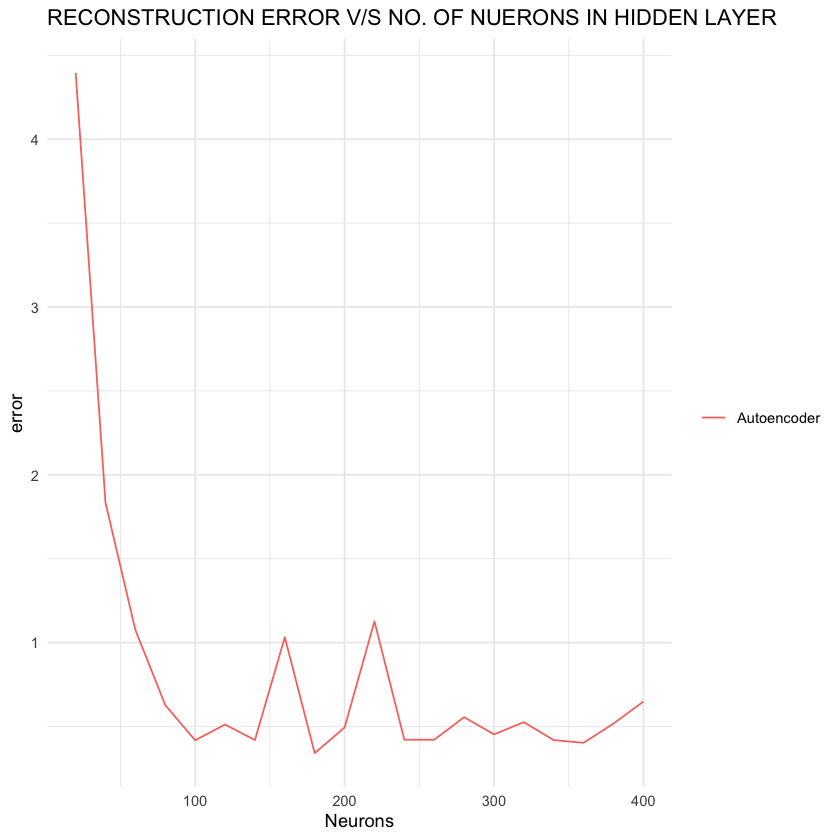

In [15]:
ggplot(data = error, aes(x = Neurons, y = error, color = 'Autoencoder')) + geom_line() + scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("RECONSTRUCTION ERROR V/S NO. OF NUERONS IN HIDDEN LAYER")

## Three Layer Neural Network 
**STEP 4:** Building the 3-layer NN to build a classification model using all the original attributes from the training set and change the number of its neurons to: 20, 40, 60, 80, .., 400.

In [21]:
#Error function
errors <- function(Y, T){
    return (sum(Y!=T)/nrow(T))}

flag = 1   #counter
K = seq(20, 400, 20)   # number of neurons: 20, 40, 60, 80, ..., 400 
C_error <- data.frame('Neurons'=K)    # dataframe to record classification error

#for every different number of neurons in hidden layer
for (k in K){
  
    #train model on labeled data
    NN <- h2o.deeplearning(
        x = 2:785, # select all pixels
        y = 1,   # select label
        training_frame = labeled.frame, # labeled frame 
        hidden = c(k), # number of units
        epochs = 50, # maximum number of epoches  
        activation = 'Tanh', # activation function 
        autoencoder = FALSE,  # it IS NOT an autoencoder
    )
    
    test.predict <- h2o.predict(NN, test.frame)$predict  #predict the label
    C_error[flag,'error'] = errors(test.frame$label, test.predict) #calculate and store error using error function
    flag = flag + 1   #update counter
} 


  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

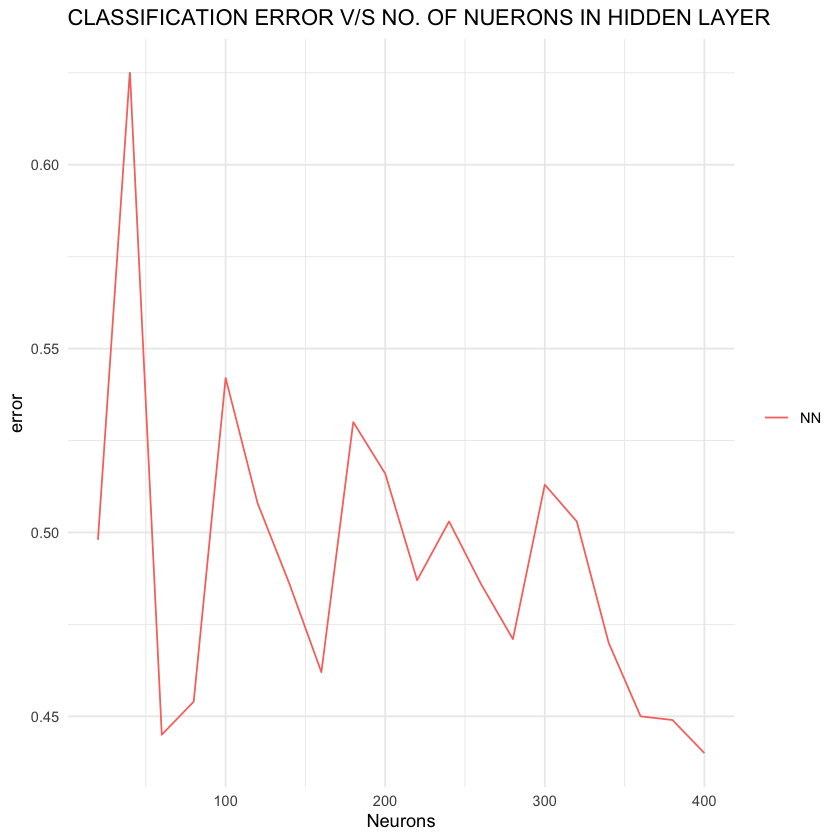

In [22]:
ggplot(data = C_error, aes(x = Neurons, y = error, color = "NN")) + geom_line() + scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("CLASSIFICATION ERROR V/S NO. OF NUERONS IN HIDDEN LAYER")

## Self-taught network
**STEP 5:** Building augmented self-taught networks using the models learnt in Step II.
- Add the output of the middle layer as extra features to the original feature set.
- Train a 3-layer NN (similar to Step 4) using all features (original + extra). Then calculate and record the test error.

In [33]:
flag = 1
for (i in seq(20,400,20)){

    #Extracting features for TO LABELED frame using saved autoencoder models
    labeled_features <- as.matrix(h2o.deepfeatures(AE[[flag]],labeled.frame,layer = 1))
    labeled_features.h2o <- as.h2o(labeled_features)
    
    #Adding features TO LABELED frame 
    new_labeled.frame = h2o.cbind(labeled.frame,labeled_features.h2o)
    
    
    #Extracting for test frame using saved autoencoder models
    test_features <- as.matrix(h2o.deepfeatures(AE[[flag]],test.frame,layer = 1))
    test_features.h2o <- as.h2o(test_features)
    
    #Adding to test frame
    new_test.frame = h2o.cbind(test.frame,test_features.h2o)
    
    
    #Training neural network with more features
    new_NN <- h2o.deeplearning(
    x = 2:ncol(new_labeled.frame),
    y = 1,
    training_frame = new_labeled.frame,# new labeled frame with expra features     
        hidden = c(k), # number of units
        epochs = 50, # maximum number of epoches  
        activation = 'Tanh', # activation function 
        autoencoder = FALSE,  # it IS NOT an autoencoder
        )
        
    
    test.predict <- h2o.predict(new_NN, new_test.frame)$predict  #predict the label
    C_error[flag,'ST_error'] = errors(new_test.frame$label,test.predict)  #calculate and store error using error function
    
    #update counter
    flag = flag + 1
    
    
}

**STEP 6:** Ploting the error rates for the 3-layer neural networks from Step 4 and the augmented self-taught networks from Step 5, while the x- axis is the number of extra features and y-axis is the classification error.

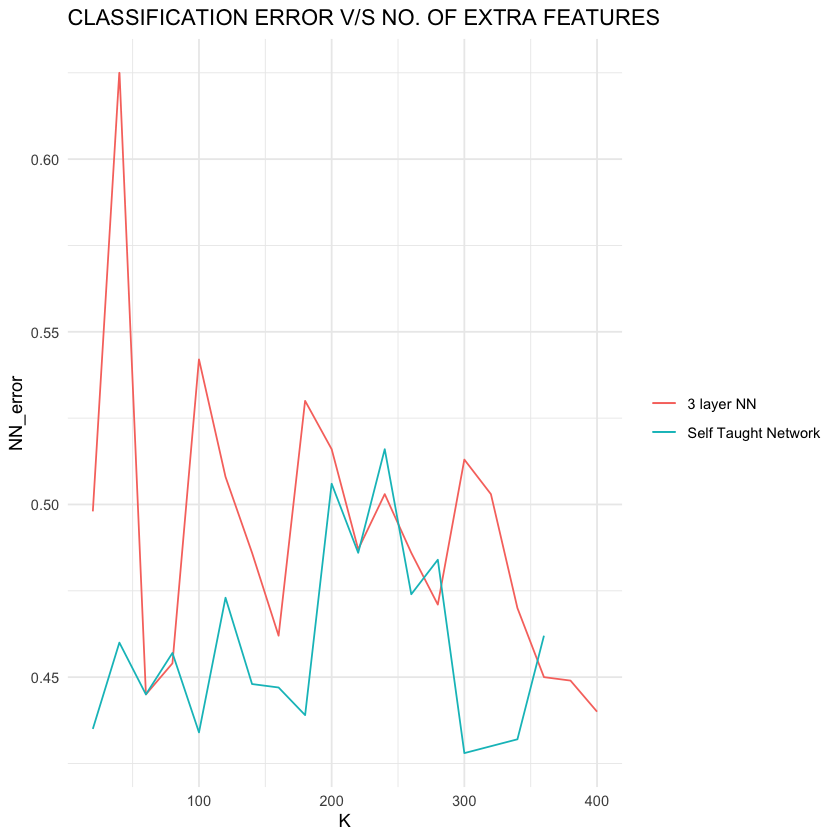

In [25]:
colnames(C_error) <- c("K", "NN_error" , "ST_error")
ggplot(data = C_error) + geom_line(aes(x = K, y = NN_error, color = "3 layer NN")) + geom_line(aes(x = K, y = ST_error, color = "Self Taught Network")) + scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("CLASSIFICATION ERROR V/S NO. OF EXTRA FEATURES")